In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring the shape of different perturbation paths for NCMC
Focusing on the partial charge perturbation, which is likely behind much of the work.

In [48]:
npert = 20
lin_frac = np.arange(float(npert+1))/npert
q_oxy = -0.834    # Partial charge on oxygen
q_cat = +1.0      # Partial charge on cation
q_an = -1.0       # Partial charge on anion

### Linear path

The simplest perturbation path is linear:

In [49]:
linear_path = q_oxy*(1 - lin_frac) + q_cat*lin_frac
print linear_path

[-0.834  -0.7423 -0.6506 -0.5589 -0.4672 -0.3755 -0.2838 -0.1921 -0.1004
 -0.0087  0.083   0.1747  0.2664  0.3581  0.4498  0.5415  0.6332  0.7249
  0.8166  0.9083  1.    ]


We may require more points at the charged end. 

### Log path
The gradient gradually descreases as the path progresses (gradient = $1/n$ for the nth step)

In [50]:
log_frac = np.log(np.arange(1,float(npert+2)))
log_frac = log_frac/np.max(log_frac)

log_path = q_oxy*(1 - log_frac) + q_cat*log_frac

### Half sigmoid path

In [51]:
def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

In [94]:
sig_frac = logistic([1,5,3],lin_frac)
sig_frac = sig_frac - np.min(sig_frac)
sig_frac = sig_frac/np.max(sig_frac)

sig_path = q_oxy*(1 - sig_frac) + q_cat*sig_frac

[ 0.95257413  0.96267311  0.97068777  0.97702263  0.98201379  0.98593637
  0.98901306  0.99142251  0.99330715  0.99477987  0.99592986  0.99682732
  0.99752738  0.99807327  0.99849882  0.99883049  0.99908895  0.99929033
  0.99944722  0.99956944  0.99966465]


## Viewing the paths
Each path has a varying degree of 'slowness' with respect to the perturbation of charge. I've chosen the non-linear paths to be slower at the ionic end.

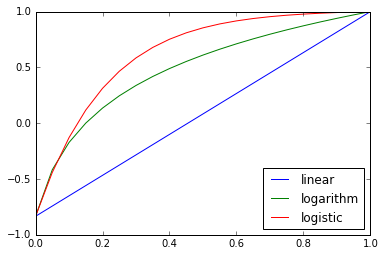

In [98]:
plt.plot(fraction,linear_path)
plt.plot(fraction,log_path)
plt.plot(fraction,sig_path)
plt.legend(('linear','logarithm','logistic'),loc=0)
plt.show()